In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
X = np.random.rand(100, 10)
y = np.random.rand(100)
model = RandomForestRegressor(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Average MAE: {-np.mean(scores):.4f}")

Average MAE: 0.2054


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MAE: {-grid_search.best_score_:.4f}")

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best CV MAE: 0.2650


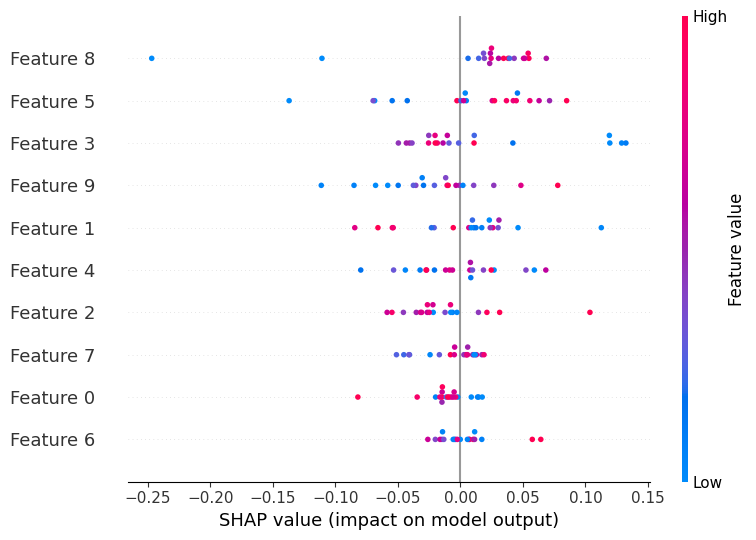

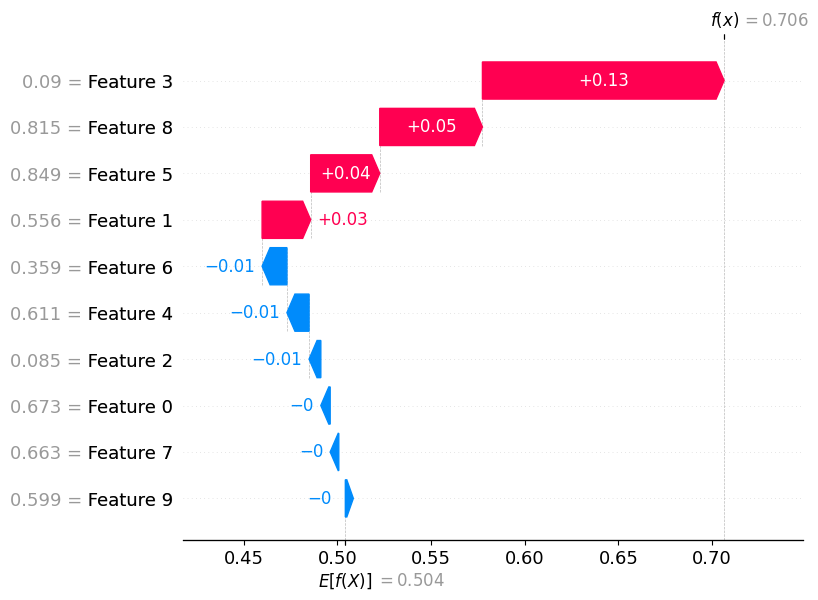

In [3]:
import shap
import xgboost as xgb
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)
X_val = np.random.rand(20, 10)
model = xgb.XGBRegressor().fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)
shap.plots.waterfall(shap_values[0])